In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

## Step: 1 Load the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\IP G3\Downloads\Mall_Customers.csv")

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.shape # With this you get to knopw how much raws and columns in your dataset

(200, 5)

In [9]:
data.columns # You get to know all column names and you can easily copy the name of the column from here

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
data.isnull().sum() # Helpful for findinf null values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Step : 2 - Explore the data

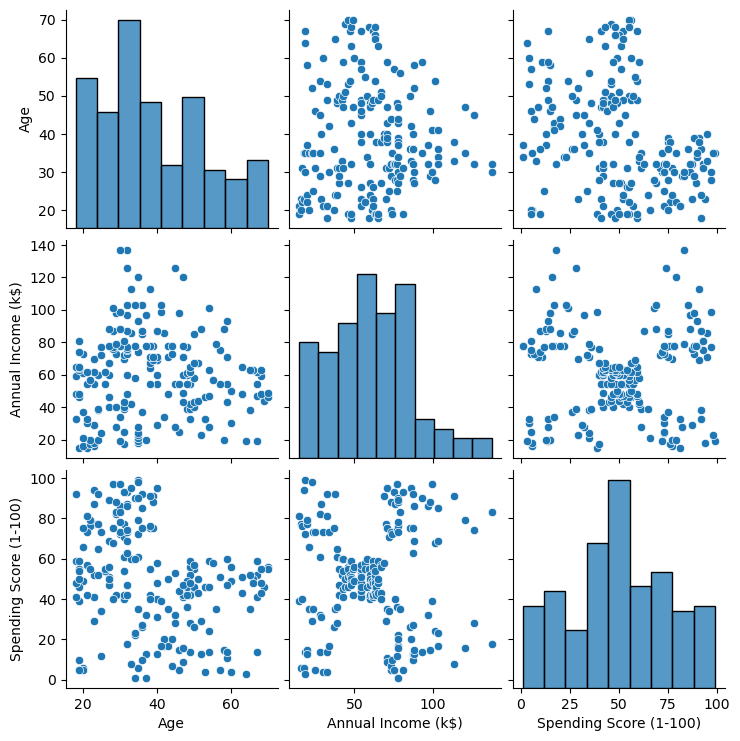

In [13]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

## Step : 3 - Select Feature and Scale

In [14]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

## Step : 4 - Use Elbow Method to choose Number of Clusters

In [15]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_Scaled)
    inertia.append(kmeans.inertia_)

### Plot the Elbow Curve

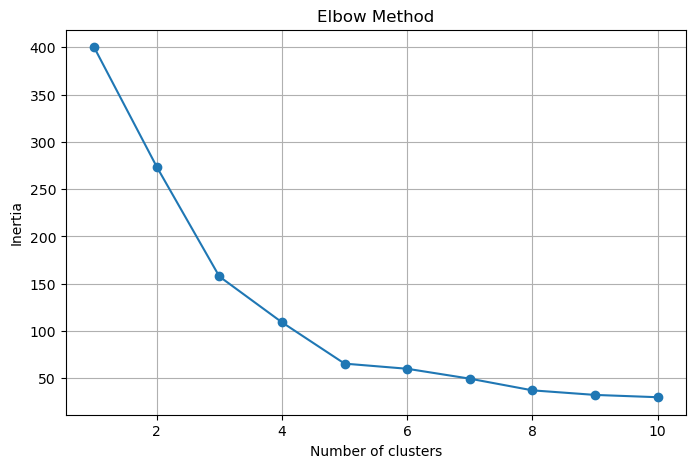

In [19]:
plt.figure(figsize = (8,5))
plt.plot(range(1,11), inertia, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Step : 5 - Apply Kmeans with the most Suitable k (lets say k =5)

In [57]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
data['Cluster'] = kmeans.fit_predict(X_Scaled)

### Visualize Clusters

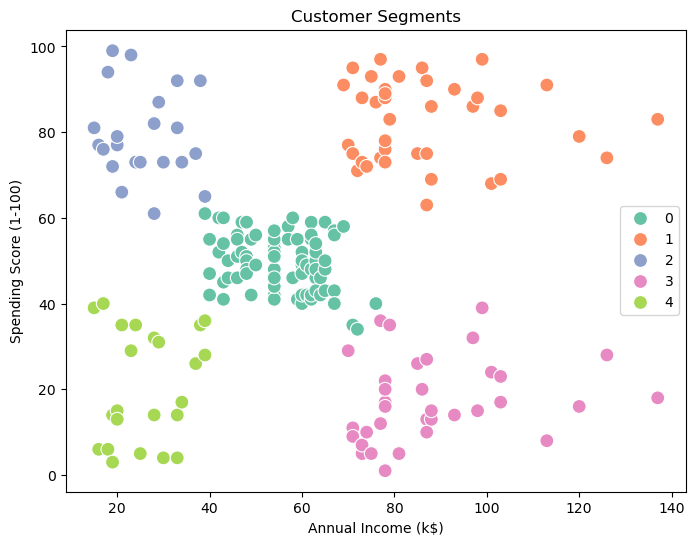

In [68]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = data, x = 'Annual Income (k$)', y ='Spending Score (1-100)', hue = 'Cluster', palette = 'Set2', s = 100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
data['Cluster'].value_counts()

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

### We can also use silhouette_score to find the k

In [61]:
score = silhouette_score(X_Scaled, kmeans.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.5546571631111091


### Let's try different k values

In [33]:
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_Scaled)
    score = silhouette_score(X_Scaled, kmeans.labels_)
    scores.append(score)

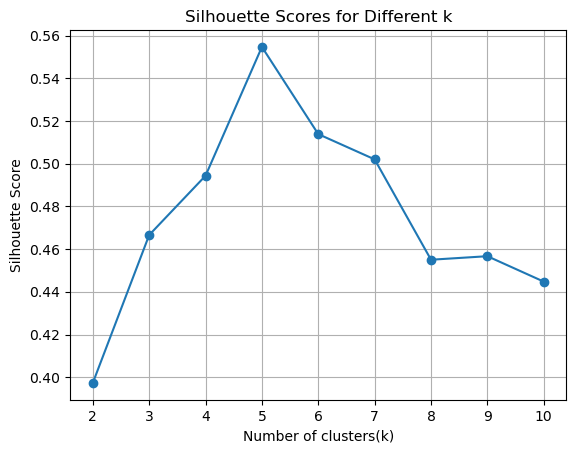

In [35]:
plt.plot(range(2,11), scores, marker = 'o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()